In [20]:
import random
import numpy as np
import seaborn as sns
from scipy.stats import t

"""
Prize           $1 Big  $1 Small

First           2000    3000
Second          1000    2000
Third            490     800
Starter          250       -
Consolation       60       -
"""

'\nPrize           $1 Big  $1 Small\n\nFirst           2000    3000\nSecond          1000    2000\nThird            490     800\nStarter          250       -\nConsolation       60       -\n'

In [28]:
def generate_winning_numbers():
    number_bank = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    list_winning_numbers = []

    for i in range(23):
        generated_num = None
        for i in range(4):
            lucky_no = random.randint(0, 9)
            if generated_num is None:
                generated_num = number_bank[lucky_no]
            else:
                generated_num += number_bank[lucky_no]
        if generated_num not in list_winning_numbers:
            list_winning_numbers.append(generated_num)
        else:
            pass

    return list_winning_numbers

earnings_list = []

for i in range(1000):
    my_number = '2809'
    big_bet = 1
    small_bet = 1
    earnings = 0
    for i in range(10000):
        list_of_winning_numbers = generate_winning_numbers()
        first = list_of_winning_numbers[0]
        second = list_of_winning_numbers[1]
        third = list_of_winning_numbers[2]
        starter = list_of_winning_numbers[3:13]
        consolation = list_of_winning_numbers[13:]

        earnings -= big_bet
        earnings -= small_bet

        if my_number == first:
            earnings += (big_bet * 2000) + (small_bet * 3000)
        elif my_number == second:
            earnings += (big_bet * 1000) + (small_bet * 2000)
        elif my_number == third:
            earnings += (big_bet * 490) + (small_bet * 800)
        elif my_number in starter:
            earnings += (big_bet * 250)
        elif my_number in consolation:
            earnings += (big_bet * 60)
    earnings_list.append(earnings)


<AxesSubplot:ylabel='Count'>

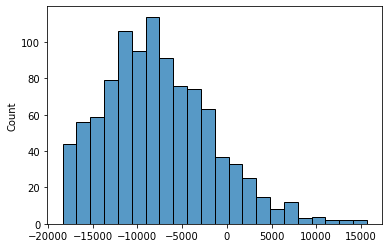

In [29]:
sns.histplot(earnings_list)

In [30]:
result = np.array(earnings_list)
m = result.mean()
s = result.std()
dof = len(result) - 1
confidence = 0.95
t_crit = np.abs(t.ppf((1-confidence)/2,dof))

print(m)
print(m-s*t_crit/np.sqrt(len(result)), m+s*t_crit/np.sqrt(len(result)))



-7625.95
-7999.596045923023 -7252.303954076977
